## Задание 2. Подсчет ядер.

1. Посчитайте графлетово ядро размера 3 (максимальный размер графлета - 3).
2. Посчитайте W L3 ядро (3 итерации алгоритма). Для этой задачи вы можете написать программу. Нельзя использовать какие-то готовые реализации подсчета ядер. В качестве результата в этом случае нужно представить код и получившиеся векторы для каждого из графов.

In [60]:
import networkx as nx
import numpy as np




In [61]:
G1 = nx.Graph()
G2 = nx.Graph()

G1.add_edges_from([
    (1, 5), 
    (1, 4),
    (4, 2),
    (5, 3),
    (2, 3),
    (3, 6)
])

G2.add_edges_from([
    (5, 1),
    (1, 4),
    (4, 2),
    (4, 3),
    (4, 6),
    (2, 3),
    (3, 6)
])

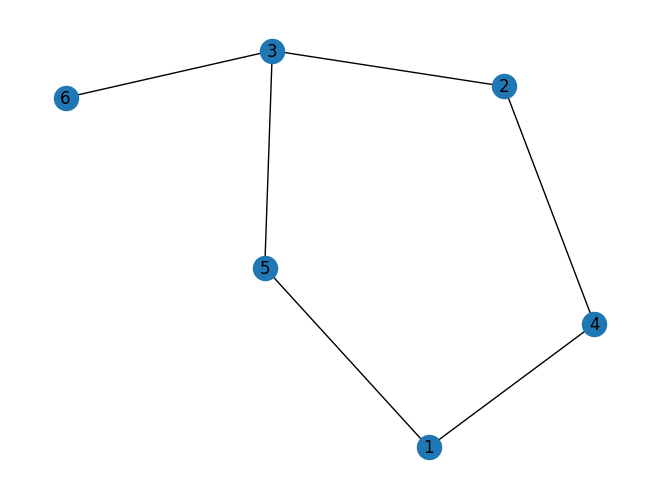

In [62]:
nx.draw(G1, with_labels=True)

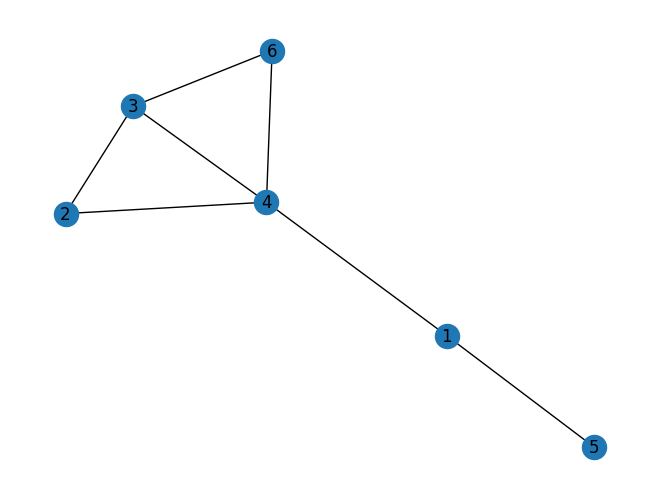

In [63]:
nx.draw(G2, with_labels=True)

In [64]:
def graphlets_size_3():
    graphlets = []
    for i in range(1, 7):
        for j in range(1, 7):
            for k in range(1, 7):
                if i != j and i != k and j != k:
                    graphlets.append([i, j, k])
    return graphlets

def graphlet_degree_vector(G):
    graphlets = graphlets_size_3()
    graphlet_degree_vector = []
    for graphlet in graphlets:
        graphlet_degree_vector.append(G.degree(graphlet[0]) + G.degree(graphlet[1]) + G.degree(graphlet[2]))
    return graphlet_degree_vector

def graphlet_kernel(G1, G2):
    G1_vector = graphlet_degree_vector(G1)
    G2_vector = graphlet_degree_vector(G2)
    return np.dot(G1_vector, G2_vector)

print(graphlet_kernel(G1, G2))


5076


In [65]:
#Посчитайте WL_3 ядро (3 итерации алгоритма) для графов G1 и G2. without using networkx
# Weisfeiler-Lehman Kernel
# Идея алгоритма - итеративная аггрегация по соседям
def WL_3(G1, G2):
    # Первая итерация
    G1_labels = {}
    G2_labels = {}
    for node in G1.nodes():
        G1_labels[node] = G1.degree(node)
    for node in G2.nodes():
        G2_labels[node] = G2.degree(node)
    # Вторая итерация
    for node in G1.nodes():
        for neighbor in G1.neighbors(node):
            G1_labels[node] += G1.degree(neighbor)
    for node in G2.nodes():
        for neighbor in G2.neighbors(node):
            G2_labels[node] += G2.degree(neighbor)
    # Третья итерация
    for node in G1.nodes():
        for neighbor in G1.neighbors(node):
            G1_labels[node] += G1.degree(neighbor)
    for node in G2.nodes():
        for neighbor in G2.neighbors(node):
            G2_labels[node] += G2.degree(neighbor)
    return G1_labels, G2_labels

G1_labels, G2_labels = WL_3(G1, G2)

print(G1_labels)



{1: 10, 5: 12, 4: 10, 2: 12, 3: 13, 6: 7}


## Задание 4. PageRank. Алгоритм

In [66]:
G = nx.Graph()
G.add_edges_from([
    (1, 5), 
    (1, 3),
    (1, 4),
    (2, 3),
    (2, 4)
])

In [67]:
def stochastic_matrix(graph):
    num_nodes = len(graph.nodes)
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    for edge in graph.edges:
        source, target = edge
        adjacency_matrix[source - 1][target - 1] = 1  

    row_sums = adjacency_matrix.sum(axis=1)
    row_sums[row_sums == 0] = 1  
    adjacency_matrix = adjacency_matrix / row_sums[:, np.newaxis]

    return adjacency_matrix

adjacency_matrix = stochastic_matrix(G)
print(adjacency_matrix)


[[0.         0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


In [68]:
r = np.array([1, 0, 0, 0, 0])
print(np.dot(r, adjacency_matrix))
print(np.dot(np.dot(r, adjacency_matrix), adjacency_matrix))

[0.         0.         0.33333333 0.33333333 0.33333333]
[0.         0.66666667 0.         0.         0.        ]


In [69]:
d = 0.85

pagerank = np.array([1/5] * 5)

max_iterations = 100
tolerance = 1e-6

for i in range(max_iterations):
    new_pagerank = (1 - d) / 5 + d * np.dot(adjacency_matrix, pagerank)
    if np.allclose(new_pagerank, pagerank, atol=tolerance):
        break
    pagerank = new_pagerank

pagerank_rounded = np.round(pagerank, 2)
print(pagerank_rounded)

[0.07 0.03 0.06 0.06 0.03]


Для пункта 4 у нас матрица смежности будет состоять только из 1/3 поэтому:

In [70]:
transition_matrix = (1/3) * np.ones((5, 5))

d = 0.85

pagerank = np.array([1/5] * 5)

max_iterations = 100
tolerance = 1e-6

for i in range(max_iterations):
    new_pagerank = (1 - d) * (1/5) + d * np.dot(transition_matrix, pagerank)
    if np.allclose(new_pagerank, pagerank, atol=tolerance):
        break
    pagerank = new_pagerank

pagerank_rounded = np.round(pagerank, 2)
print(pagerank_rounded)

[3.64197061e+14 3.64197061e+14 3.64197061e+14 3.64197061e+14
 3.64197061e+14]
